2일차 2교시는 머신러닝 알고리즘 중 가장 직관적이고, 인간의 사고방식과 가장 유사하여 의료 현장에서 설명력(Interpretability)을 이유로 사랑받는 **'의사결정나무(Decision Tree)'**를 다룬다.

이 시간의 핵심은 **"기계가 어떻게 스무고개 게임을 통해 정답을 찾아가는지"**, 그리고 **"무엇이 좋은 질문이고 무엇이 나쁜 질문인지를 수학적으로 어떻게 판단하는지"**를 이해하는 것이다.

---

# 📘 [2일차 2교시] 2.1. 의사결정나무: 스무고개 놀이로 배우는 진단 알고리즘

## 1. 인간의 추론 과정을 닮은 알고리즘

### 1) 직관이 아닌 논리의 흐름
우리가 의사를 만나러 병원에 갔을 때를 상상해 보자. 의사는 환자의 얼굴만 보고 대뜸 "당신은 맹장염입니다"라고 진단하지 않는다. 의사는 머릿속에 있는 거대한 흐름도(Flowchart)를 따라 질문을 던지며 범위를 좁혀나간다.

*   **질문 1:** "열이 38도 이상입니까?" $\rightarrow$ 예. (감염 가능성 의심)
*   **질문 2:** "배가 아픈가요?" $\rightarrow$ 예. (소화기계 질환 의심)
*   **질문 3:** "오른쪽 아랫배를 누르면 통증이 심해지나요?" $\rightarrow$ 예. (맹장염 확신)

이처럼 어떤 대상을 분류하거나 예측하기 위해, 예/아니오로 답할 수 있는 **질문(Rule)**을 연속적으로 던지며 정답을 찾아가는 과정을 모델링한 것이 바로 **'의사결정나무(Decision Tree)'**이다.

### 2) 나무를 거꾸로 뒤집은 모양
이 알고리즘의 이름이 '나무(Tree)'인 이유는 그 구조가 나무를 뒤집어 놓은 것과 같기 때문이다.
*   **뿌리 노드 (Root Node):** 맨 꼭대기에 있는 첫 번째 질문이다. 모든 데이터가 이곳에서 시작한다. 가장 중요한 기준이 여기에 위치한다.
*   **중간 노드 (Internal Node):** 뿌리에서 갈라져 나온 하위 질문들이다.
*   **잎 노드 (Leaf Node):** 더 이상 질문하지 않고 최종 결론(진단)을 내리는 끝부분이다.

머신러닝에서의 의사결정나무 학습이란, 수많은 질문 후보들(나이가 50 이상인가? 혈압이 120 이상인가? 성별이 남자인가? 등) 중에서 **"데이터를 가장 잘 나누는 최적의 질문 순서"**를 찾아내는 과정이다.

---

## 2. 핵심 원리: 불순도(Impurity)를 낮춰라

그렇다면 기계는 수백 가지의 가능한 질문 중에서 "지금 이 단계에서 어떤 질문을 던지는 게 최고인지"를 어떻게 판단할까? 이를 이해하기 위해서는 **'불순도(Impurity)'**라는 개념을 알아야 한다.

### 1) 섞여 있으면 나쁜 것이고, 순수하면 좋은 것이다
상자 안에 **빨간 공(환자)** 50개와 **파란 공(정상인)** 50개가 뒤섞여 있다고 가정해 보자.
우리는 이 상자에 칸막이(질문)를 설치해서 빨간 공과 파란 공을 따로 모으고 싶다.

*   **상태 A (질문 전):** 빨강 50 / 파랑 50. 매우 혼잡하다. 이를 **'불순도가 높다'**고 한다.
*   **질문 1 ("나이가 40세 이상인가?"):**
    *   왼쪽 방: 빨강 45 / 파랑 5 (대부분 환자)
    *   오른쪽 방: 빨강 5 / 파랑 45 (대부분 정상)
    *   **결과:** 완벽하진 않지만 꽤 잘 나뉘었다. 각 방의 색깔이 뚜렷해졌다. 이를 **'불순도가 낮아졌다(순수도가 높아졌다)'**고 한다.
*   **질문 2 ("혈액형이 A형인가?"):**
    *   왼쪽 방: 빨강 25 / 파랑 25
    *   오른쪽 방: 빨강 25 / 파랑 25
    *   **결과:** 나누기 전과 다를 바가 없다. 여전히 뒤섞여 있다. 이 질문은 아무런 정보도 주지 못했다. 불순도가 여전히 높다.

기계는 가능한 모든 질문을 시뮬레이션해 본 뒤, **"질문을 던지기 전보다 던진 후에 불순도가 가장 큰 폭으로 떨어지는 질문"**을 선택한다. 이 불순도가 줄어드는 폭을 전문 용어로 **'정보 이득(Information Gain)'**이라고 한다.

### 2) 불순도를 측정하는 자: 지니 계수와 엔트로피
불순도가 '높다/낮다'를 숫자로 표현하는 대표적인 두 가지 공식이 있다.

#### ① 지니 불순도 (Gini Impurity)
*   경제학에서 소득 불평등을 나타내는 지니 계수와는 조금 다르지만, 개념은 비슷하다.
*   **0.5:** 반반 섞여 있는 최악의 상태. (질서가 없음)
*   **0.0:** 한 종류만 있는 완벽한 상태. (순수함)
*   계산이 빨라서 대부분의 알고리즘(Scikit-learn 등)에서 기본값으로 사용한다.

#### ② 엔트로피 (Entropy)
*   물리학의 열역학에서 빌려온 개념으로, **'무질서도'**를 의미한다.
*   **1.0:** 반반 섞여 있는 가장 무질서한 상태.
*   **0.0:** 한 종류만 있는 가장 질서 정연한 상태.
*   지니 계수와 거의 비슷한 결과를 내지만, 로그(log) 계산이 들어가서 계산 속도가 미세하게 느리다.

**결론:** 의사결정나무는 매 단계마다 **"어떻게 나눠야 지니 계수(또는 엔트로피)를 0에 가깝게 만들 수 있을까?"**를 고민하며 가지를 뻗어 나간다.

---

## 3. 화이트 박스(White Box): 설명 가능한 AI (XAI)

### 1) 블랙 박스 vs 화이트 박스
최근 유행하는 딥러닝(뉴럴 네트워크)은 성능은 좋지만, 내부가 어떻게 돌아가는지 알기 어려운 **'블랙 박스(Black Box)'** 모델이다. AI가 "이 환자는 암입니다"라고 했을 때, 의사가 "왜죠?"라고 물으면 딥러닝은 "수백만 개의 파라미터가 복잡하게 계산된 결과입니다"라고 밖에 답할 수 없다. 이는 의료 현장에서 치명적인 단점이 될 수 있다.

반면, 의사결정나무는 대표적인 **'화이트 박스(White Box)'** 모델이다. 속이 투명하게 보인다.
> **"이 환자는 공복 혈당이 126 이상이고(조건1), BMI가 30 이상이며(조건2), 가족력이 있기 때문에(조건3) 당뇨병으로 예측했습니다."**

이렇게 예측의 근거를 인간의 언어(Rule)로 명확히 설명할 수 있다. 이 특징 때문에 의사결정나무는 의사들이 진단 가이드라인을 만들거나, 질병의 주요 위험 인자를 파악할 때 가장 선호하는 도구이다.

### 2) 특성 중요도 (Feature Importance)
의사결정나무를 학습시키고 나면, 보너스로 **'어떤 변수가 가장 중요한지'**를 알 수 있다.
나무의 뿌리(맨 위)에 가까울수록, 그리고 자주 사용될수록 불순도를 크게 낮추는 중요한 질문이다.
*   *예시:* 유방암 진단 모델을 만들었더니, '종양의 크기'나 '모양'보다는 **'세포 핵의 질감'**이 가장 상위 질문으로 나왔다.
*   *해석:* "아, 유방암을 판별할 때는 질감이 가장 결정적인 단서구나!"라는 의학적 통찰을 얻을 수 있다.

---

## 4. 의사결정나무의 치명적 약점: 과적합(Overfitting)

하지만 의사결정나무는 완벽하지 않다. 오히려 초보자가 사용하기엔 가장 위험한 모델일 수도 있다. 그 이유는 **"너무 융통성 없이 공부하기 때문"**이다.

### 1) 암기왕 트리
의사결정나무에게 제약을 주지 않고 학습시키면, 기계는 훈련 데이터에 있는 모든 샘플을 완벽하게(불순도 0이 될 때까지) 분류하려고 든다.
예를 들어, 데이터 중에 아주 특이한 환자가 한 명 있다고 치자.
*   *환자 K:* 100세, 술 담배를 매일 함, 운동 안 함, 그런데 **매우 건강함**.

일반적인 모델이라면 이 환자를 '이상치(Outlier)'나 '예외'로 보고 무시할 것이다. 하지만 의사결정나무는 이 한 명까지 분류해내기 위해 억지스러운 질문을 만들어낸다.
> "나이가 99세 이상이고, 흡연량이 하루 1갑 이상이며, 사는 곳이 서울 강남구인 사람은 $\rightarrow$ 건강하다."

이 규칙은 환자 K에게는 맞지만, 보편적인 의학 상식과는 맞지 않다. 이렇게 모델이 학습 데이터의 잡음(Noise)까지 법칙인 줄 알고 외워버려서 나무가 지나치게 복잡해지는 현상을 **'과적합'**이라고 한다. 이런 모델은 실전(새로운 환자)에서 엉망인 결과를 내놓는다.

### 2) 가지치기 (Pruning): 욕심 버리기
과적합을 막기 위해 우리는 나무가 무작정 자라지 못하게 **'가지치기'**를 해야 한다. Scikit-learn에서는 이를 **하이퍼파라미터**로 조절한다.

*   **Max Depth (최대 깊이):** "질문을 최대 5번까지만 해라."
    *   나무의 깊이를 제한해서 너무 디테일한 질문을 못 하게 막는다.
*   **Min Samples Split (분할을 위한 최소 샘플 수):** "남은 환자가 10명도 안 되면 더 이상 질문하지 말고 멈춰라."
    *   소수의 특이한 환자들을 걸러내기 위해 억지로 질문을 만드는 것을 방지한다.
*   **Min Samples Leaf (잎 노드의 최소 샘플 수):** "최종 그룹에는 적어도 5명 이상은 모여 있어야 한다."
    *   한 명만을 위한 규칙이 만들어지는 것을 막는다.

이처럼 의사결정나무를 잘 쓰기 위해서는 **"어디서 멈출 것인가"**를 정해주는 것이 학습시키는 것보다 더 중요하다.

---

## 5. 요약: 2일차 2교시의 핵심 메시지

1.  **의사결정나무:** 스무고개 하듯이 질문(조건)을 단계적으로 던져서 데이터를 분류하는 직관적인 모델이다.
2.  **불순도(지니/엔트로피):** 질문을 통해 데이터가 얼마나 깔끔하게 나뉘었는지를 측정하는 지표이다. 모델은 불순도를 낮추는 방향으로 학습한다.
3.  **장점 (화이트 박스):** 판단의 근거를 명확하게 설명할 수 있어 헬스케어 분야에서 신뢰도가 높다. 어떤 변수가 중요한지도 알려준다.
4.  **단점 (과적합):** 놔두면 학습 데이터를 통째로 외울 때까지 끝없이 복잡해진다.
5.  **해결책 (가지치기):** 나무의 깊이(Depth)나 잎의 크기 등을 제한하여 모델을 단순화하고 일반화 성능을 높여야 한다.



## 2.2. \[예제 1\] 불순도(Impurity) 계산해보기

지니 불순도가 실제로 어떻게 계산되는지 수식 없이 코드로 직관적으로
이해한다.

**상황:** 환자 10명이 있는 병동. 암 환자(1)와 정상인(0)이 섞여 있다.

``` python
import numpy as np
import matplotlib.pyplot as plt

# 지니 불순도 계산 함수
def gini_impurity(labels):
    # 각 클래스(0, 1)의 비율 계산
    classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    
    # [수정] probabilities 2 -> probabilities ** 2 (제곱 연산자 추가)
    # Gini = 1 - sum(p^2)
    gini = 1 - np.sum(probabilities ** 2)
    
    return gini

# Case 1: 반반 섞여있을 때 (최악의 불순도)
group_A = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 0이 5개, 1이 5개
print(f"그룹 A (5:5)의 지니 불순도: {gini_impurity(group_A):.2f}") # 예상: 0.5

# Case 2: 어느 정도 분류된 상태
group_B = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1] # 0이 8개, 1이 2개
print(f"그룹 B (8:2)의 지니 불순도: {gini_impurity(group_B):.2f}") # 숫자가 낮아져야 함

# Case 3: 완벽하게 분류된 상태 (순수)
group_C = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 0만 10개
print(f"그룹 C (10:0)의 지니 불순도: {gini_impurity(group_C):.2f}") # 예상: 0.0

# 설명:
# 머신러닝 모델은 질문을 던져서 그룹 A를 그룹 C에 가깝게 만들려고 노력한다.
# 지니 계수가 0이 되는 순간이 분류가 끝나는 순간이다.
```


> **📖 문제 풀이 가이드**
>
> **불순도(Impurity)**의 개념을 머리가 아닌 손으로 익힙니다.
> - **목표**: 지니 계수(Gini Impurity) 계산 공식을 코드로 구현하고, 여러 상황(5:5, 8:2, 10:0)에서 값이 어떻게 변하는지 확인합니다.
> - **직관**: 빨간 공과 파란 공이 반반 섞여 있으면(=혼란스러우면) 지니 계수는 0.5가 되고, 한 가지 색만 남으면(=순수하면) 0.0이 됩니다.
> - **의미**: 의사결정나무는 이 지니 계수를 0으로 만들기 위해 끊임없이 질문을 던지는 알고리즘입니다.



In [2]:
# do write code
import numpy as np
import matplotlib.pyplot as plt

def gini_impurity(labels):
    classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)

    gini = 1 - np.sum(probabilities ** 2)

    return gini

def entropy_impurity(labels):
    #각 클래스의 비율계산
    classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)

    #Entropy = -sum(pp*log2(p))
    #p가 0일경우 log2(0)은 정의되지 않으므로, 0인 경우는 제외하고 계산합니다.
    #하지만 np.unique의 결과에서 probabilities는 항상 > 0 입니다.
    ent = -np.sum(probabilities*np.log2(probabilities))
    return ent


group_A = [0,0,0,0,0,1,1,1,1,1]
print(f"그룹 A (5:5)의 지니 불순도: {gini_impurity(group_A):.2f}")
print(f"그룹 A (5:5)의 지니 불순도: {entropy_impurity(group_A):.2f}")
print("**"*30)

group_B = [0,0,0,0,0,0,0,0,1,1]
print(f"그룹 B (8:2)의 지니 불순도: {gini_impurity(group_B):.2f}")
print(f"그룹 B (8:2)의 지니 불순도: {entropy_impurity(group_B):.2f}")
print("**"*30)

group_C = [0,0,0,0,0,0,0,0,0,0]
print(f"그룹 C (10:0)의 지니 불순도: {gini_impurity(group_C):.2f}")
print(f"그룹 C (10:0)의 지니 불순도: {entropy_impurity(group_C):.2f}")
print("**"*30)


그룹 A (5:5)의 지니 불순도: 0.50
그룹 A (5:5)의 지니 불순도: 1.00
************************************************************
그룹 B (8:2)의 지니 불순도: 0.32
그룹 B (8:2)의 지니 불순도: 0.72
************************************************************
그룹 C (10:0)의 지니 불순도: 0.00
그룹 C (10:0)의 지니 불순도: -0.00
************************************************************


## 2.3. \[예제 2\] 붓꽃(Iris) 데이터로 트리 만들기

머신러닝의 Hello World인 붓꽃 데이터를 사용하여 실제로 트리를
만들어보고, 그 구조를 시각화한다.

**상황:** 꽃잎의 길이와 너비를 보고 3가지 품종을 분류한다.

``` python
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1. 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. 모델 학습
# max_depth=None: 제한 없이 끝까지 학습해라 (기본값)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 4. 트리 시각화 (가장 중요한 부분)
plt.figure(figsize=(12, 8))
plot_tree(tree_model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, rounded=True)
plt.show()

# 설명:
# 맨 위(Root)에서 어떤 질문을 던졌는가? (예: petal width <= 0.8)
# filled=True 옵션 덕분에, 한 종류의 꽃이 많이 모일수록 색깔이 진해진다 (불순도가 낮음).
# 색이 섞여 있는 박스는 아직 분류가 덜 된 상태를 의미한다.
```


> **📖 문제 풀이 가이드**
>
> 붓꽃(Iris) 데이터를 이용해 실제로 나무를 심어보고, **시각화(Visualization)**를 통해 모델의 생각을 엿봅니다.
> - **핵심**: `plot_tree` 함수를 통해 그려진 그림을 해석할 줄 알아야 합니다.
>   - 맨 위 상자(Root Node)가 가장 중요한 질문입니다.
>   - 상자의 색이 진할수록 분류가 확실하게 되었다는 뜻입니다.
>   - `samples`: 이 질문에 해당되는 데이터 개수
>   - `value`: [종 A, 종 B, 종 C]의 개수 분포



In [3]:
# do write code
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

print("--- Iris Dataset Keys ---")
print(iris.keys())

print("\n--- Shape of Data & Target ---")
print(f"Data shape: {iris.data.shape}")
print(f"Target shape: {iris.target.shape}")

print("\n--- Shape of Data & Target ---")
print(f"Data shape: {iris.data.shape}")
print(f"Target shape: {iris.target.shape}")

print("\n--- Feature & Target Names ---")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")

print("\n--- Data Sample (Top 5) ---")
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(iris_df.head())

print("\n--- Target Distribution ---")
print(iris_df['target'].value_counts().sort_index)

--- Iris Dataset Keys ---
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

--- Shape of Data & Target ---
Data shape: (150, 4)
Target shape: (150,)

--- Shape of Data & Target ---
Data shape: (150, 4)
Target shape: (150,)

--- Feature & Target Names ---
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

--- Data Sample (Top 5) ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0 

## 2.4. \[예제 3\] 과적합(Overfitting)과 가지치기(Pruning)

나무를 너무 깊게 키웠을 때와, 적절히 제한했을 때 결정 경계가 어떻게
변하는지 비교한다.

**상황:** 복잡한 경계면을 가진 가상의 달(Moon) 모양 데이터 분류.

``` python
from sklearn.datasets import make_moons

# 1. 복잡한 데이터 생성
X_m, y_m = make_moons(n_samples=100, noise=0.25, random_state=42)

# 2. 두 가지 모델 학습
# 모델 1: 규제 없음 (과적합 유도)
tree_no_limit = DecisionTreeClassifier(random_state=42)
tree_no_limit.fit(X_m, y_m)

# 모델 2: 가지치기 적용 (깊이 제한)
tree_limit = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_limit.fit(X_m, y_m)

# 3. 결정 경계 시각화 함수 (참고용)
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)

# 비교 출력
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_boundary(tree_no_limit, X_m, y_m, "No Limit (Overfitting)")
plt.subplot(1, 2, 2)
plot_boundary(tree_limit, X_m, y_m, "Max Depth = 3 (Regularized)")
plt.show()

# 설명:
# 왼쪽 그림: 모든 점을 다 맞추려고 경계선이 아주 지저분하고 복잡하게 꼬여있다. (새 데이터에 약함)
# 오른쪽 그림: 몇 개 틀리더라도 경계선이 단순하고 부드럽다. (일반화가 잘 됨)
```


> **📖 문제 풀이 가이드**
>
> 의사결정나무의 고질병인 **과적합(Overfitting)**과 처방전인 **가지치기(Pruning)**를 비교합니다.
> - **상황**: 복잡한 달 모양(Moons) 데이터를 분류합니다.
> - **Deep Tree (규제 없음)**: 데이터 한 점 한 점을 다 맞추려고 경계선이 매우 복잡하고 지저분해집니다. (과적합)
> - **Pruned Tree (`max_depth=3`)**: 세세한 건 좀 틀리더라도, 전체적인 숲의 모양(큰 패턴)을 봅니다. 경계선이 훨씬 단순하고 부드럽습니다. (일반화)



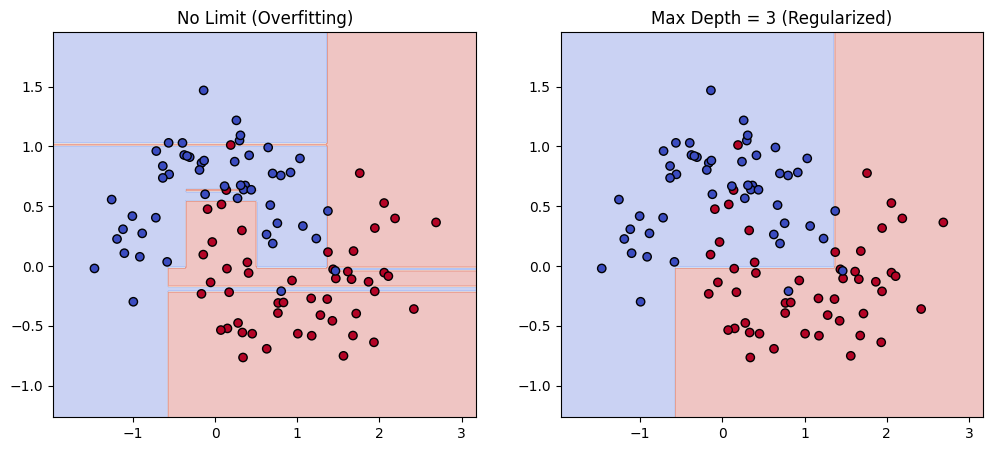

In [4]:
# do write code
from sklearn.datasets import make_moons

# 1. 복잡한 데이터 생성
X_m, y_m = make_moons(n_samples=100, noise=0.25, random_state=42)

# 2. 두 가지 모델 학습
# 모델 1: 규제 없음 (과적합 유도)
tree_no_limit = DecisionTreeClassifier(random_state=42)
tree_no_limit.fit(X_m, y_m)

# 모델 2: 가지치기 적용 (깊이 제한)
tree_limit = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_limit.fit(X_m, y_m)

# 3. 결정 경계 시각화 함수 (참고용)
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)

# 비교 출력
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_boundary(tree_no_limit, X_m, y_m, "No Limit (Overfitting)")
plt.subplot(1, 2, 2)
plot_boundary(tree_limit, X_m, y_m, "Max Depth = 3 (Regularized)")
plt.show()


## 2.5. \[예제 4\] 헬스케어의 핵심: 특성 중요도 (Feature Importance)

의사결정나무는 모델 학습 후 **“어떤 변수가 가장 중요한 질문이었나?”**를
수치로 알려준다.

**상황:** 유방암(Breast Cancer) 데이터셋을 이용하여 악성/양성을 가르는
핵심 지표 찾기.

``` python
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

# 1. 데이터 로드
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target

# 2. 모델 학습
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_c, y_c)

# 3. 특성 중요도 추출
importance = clf.feature_importances_
feature_names = cancer.feature_names

# 4. 시각화
df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
df_imp = df_imp.sort_values(by='Importance', ascending=False).head(10) # Top 10만

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
plt.title("Top 10 Important Features for Breast Cancer Diagnosis")
plt.show()

# 설명:
# 모델은 수십 개의 변수 중 'worst radius(종양 반경의 최댓값)' 같은 변수가
# 분류에 가장 결정적인 역할을 했다고 말해주고 있다.
# 의사는 이를 보고 "아, 이 지표를 중점적으로 봐야겠구나"라는 인사이트를 얻는다.
```


> **📖 문제 풀이 가이드**
>
> 의사결정나무의 가장 큰 선물, **특성 중요도(Feature Importance)**입니다.
> - **상황**: 유방암 데이터에는 30개의 복잡한 의학적 지표가 있습니다. 의사는 어디에 집중해야 할까요?
> - **해결**: 모델은 학습 과정에서 불순도를 가장 많이 낮춘 '킹메이커' 변수들에게 높은 점수를 줍니다.
> - **결과**: `feature_importances_`를 뽑아보면, 30개 중 상위 3~4개의 핵심 지표가 무엇인지 바로 알 수 있습니다.



/var/folders/zn/409vq4f90zj8hk69cncrhzw80000gp/T/ipykernel_10992/3423242180.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')


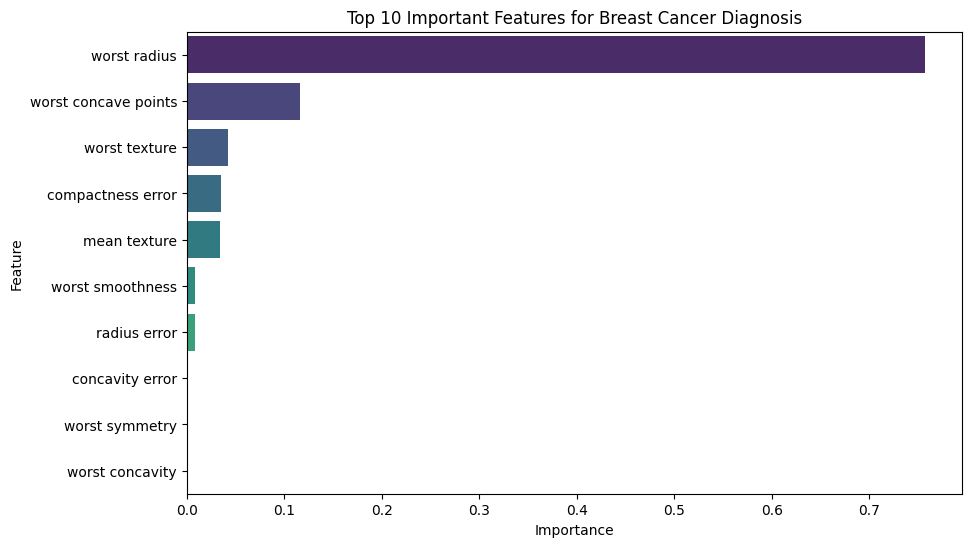

In [5]:
# do write code
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

# 1. 데이터 로드
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target

# 2. 모델 학습
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_c, y_c)

# 3. 특성 중요도 추출
importance = clf.feature_importances_
feature_names = cancer.feature_names

# 4. 시각화
df_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
df_imp = df_imp.sort_values(by='Importance', ascending=False).head(10) # Top 10만

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
plt.title("Top 10 Important Features for Breast Cancer Diagnosis")
plt.show()


## 2.6. \[예제 5\] 회귀 트리 (Regression Tree)

의사결정나무는 분류뿐만 아니라 숫자 예측(회귀)도 가능하다. 다만 직선을
긋는 게 아니라 계단 모양으로 예측한다.

**상황:** 약물 투여량에 따른 반응 예측 (비선형).

``` python
from sklearn.tree import DecisionTreeRegressor

# 1. 데이터 생성 (사인파 형태)
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg = np.sin(X_reg).ravel()
y_reg[::5] += 3 * (0.5 - np.random.rand(16)) # 노이즈 추가

# 2. 회귀 트리 학습 (깊이를 다르게 설정)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_reg, y_reg)
regr_2.fit(X_reg, y_reg)

# 3. 예측 및 시각화
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 설명:
# 파란 선(깊이 2)은 듬성듬성한 계단 모양이고, 초록 선(깊이 5)은 데이터에 더 가깝게 붙은 계단 모양이다.
# 트리는 '구간별 평균값'으로 예측하기 때문에 결과가 직선이 아닌 계단 형태(Step function)가 된다.
```


> **📖 문제 풀이 가이드**
>
> 의사결정나무로 숫자 예측(회귀)도 할 수 있습니다.
> - **특징**: 선형 회귀처럼 매끄러운 직선/곡선을 긋는 게 아니라, **계단(Step) 모양**으로 예측합니다.
> - **원리**: "X가 0~1 사이면 Y는 10, X가 1~2 사이면 Y는 20" 식으로 구간별 평균값을 내놓기 때문입니다.
> - **활용**: 데이터가 비선형적이고 규칙 기반(Rule-based)으로 끊어지는 성질이 있을 때 유용합니다.



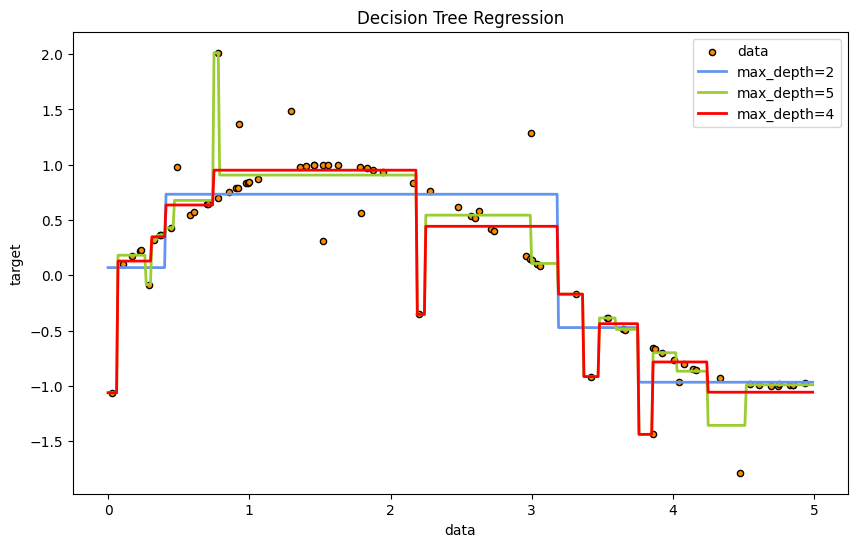

In [7]:
# do write code
from sklearn.tree import DecisionTreeRegressor

# 1. 데이터 생성 (사인파 형태)
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg = np.sin(X_reg).ravel()
y_reg[::5] += 3 * (0.5 - np.random.rand(16)) # 노이즈 추가

# 2. 회귀 트리 학습 (깊이를 다르게 설정)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=4)

regr_1.fit(X_reg, y_reg)
regr_2.fit(X_reg, y_reg)
regr_3.fit(X_reg, y_reg)

# 3. 예측 및 시각화
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=4", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()